# Modelo de Examen Practico - TLP3 - Python para Ciencia de Datos.


**A partir del datasets brindado, realizar los siguientes procedimientos:**

* Importar datasets con Pandas.
* Explorar los datos con los metodos correspondientes. 
* Limpieza de los datos (Normalización de datos).
* Obtener estadisticas.
* Mostrar los datos procesados con graficos utilizando la libreria Matplotlib.
* Exportar el contenido a un archivo sqlite utilizando PANDAS.


**Importante: Se debe documentar cada procedimiento realizado, siguiendo la siguiente estructura:**

1. Celda de Markdown (Documentación)
2. Código (Sin comentarios, se debe documentar lo sufiente solo en la celda de markdown).

## Actividades: 
### 1. Importación del Dataset con Pandas

En esta sección, se debe utilizar la librería Pandas para cargar el archivo CSV que contiene los datos de las calificaciones en un DataFrame, que es la estructura de datos fundamental para el análisis con Pandas.

### 2. Exploración Inicial de los Datos

A continuación, se deben emplear métodos de Pandas para obtener una visión general del dataset. Esto incluye mostrar las primeras filas, obtener un resumen de la información del DataFrame (tipos de datos, valores no nulos), y calcular estadísticas descriptivas de las columnas numéricas.

### 3. Limpieza y Normalización de los Datos

Esta etapa crucial deben aplicar la corrección de diversos errores presentes en el dataset. Se abordarán los valores faltantes, la inconsistencia en el formato de la columna 'Asistencia', los posibles valores atípicos y la normalización de los nombres de estudiantes y materias a un formato consistente (por ejemplo, capitalización).

### 4. Obtención de Estadísticas Descriptivas

Después de la limpieza, deben calcular nuevamente las estadísticas descriptivas para observar el impacto del proceso de limpieza en los datos numéricos. También se pueden calcular estadísticas específicas por grupo (por ejemplo, promedio de calificaciones por materia).

### 5. Visualización de los Datos con Matplotlib

En esta sección, deben utilizar la librería Matplotlib para crear visualizaciones que permitan comprender mejor la distribución de las calificaciones y la asistencia. Se generarán histogramas, diagramas de dispersión y gráficos de barras.

### 6. Exportación a Archivo SQLite

Finalmente, deben utilizar la funcionalidad de Pandas para guardar el DataFrame procesado en una base de datos SQLite. Esto permite almacenar los datos de forma estructurada para su posterior consulta y uso.



# Importaciones

In [47]:
# Se procede a realizar las importaciones necesarias para realizar las actividades.
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt

## Acividad N° 1

In [48]:
# Se crea el dataframe a partir del archivo CSV.
df = pd.read_csv("datasets_calificaciones.csv")

## Actividad N° 2

In [49]:
# Se procese a usar los metodos "head()" y "tail()" para los 5 primeros y ultimos 5 registros del dataframe.
print(df.head()) # Muestra las primeras 5 filas del dataframe
print("--------------------------------------------------------------------")
print(df.tail()) # Muestra las ultimas 5 filas del dataframe

        estudiante      Materia Parcial 1 Parcial 2 Final Asistencia
0        ana pérez  matematicas         8       7.5     9        95%
1     carlos lópez       fisica       6.2         7   NaN        88%
2      maría gómez      quimica         9       8.8   9.5       100%
3  pedro rodríguez     historia       7.5         6     7         75
4     laura vargas  matematicas                 9.2   8.5        92%
--------------------------------------------------------------------
         estudiante      Materia Parcial 1 Parcial 2 Final Asistencia
95  josefina torres     historia       7.4       6.8   7.2        81%
96  bautista vargas  matematicas       8.7       NaN   8.5        92%
97        emma soto       fisica       6.6       7.0   6.4        83%
98       mateo díaz      quimica       9.5       9.7              98%
99  sofía fernández     historia       7.1       7.6   7.5        87%


In [50]:
# Se procede a usar el metodo "info()" para mostrar la informacion del dataframe como los valores nulos y el tipo de dato.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   estudiante  100 non-null    object
 1   Materia     100 non-null    object
 2   Parcial 1   95 non-null     object
 3   Parcial 2   90 non-null     object
 4   Final       89 non-null     object
 5   Asistencia  100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB
None


In [51]:
# Se procede a usar el metodo "describe()" para calcular estadísticas de las columnas numéricas del dataframe.
print(df.describe()) 

        estudiante      Materia Parcial 1 Parcial 2 Final Asistencia
count          100          100        95        90    89        100
unique          96            7        49        45    46         35
top     mateo díaz  matematicas                 7.5   9.5        99%
freq             2           25         7         5     4          5


## Actividad N° 3

In [52]:
# Se convierte en formato titulo los valores de estudiante y materia.
# Se asegura que las columnas sean de tipo string antes de aplicar el método .str.title().
df["estudiante"] = df["estudiante"].astype(str).str.title()
df["Materia"] = df["Materia"].astype(str).str.title()

# Se convierte a numerico las columnas de calificaciones y se reemplaza los valores no numericos con NaN.
# Ademas se reemplazan los valores NaN por la mediana de cada columna.
for col in ["Parcial 1", "Parcial 2", "Final"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df[col].fillna(df[col].median())

# Se convierte a numerico la columna de asistencia, se elimina simbolo "%" y se reemplaza errores con NaN.
# Ademas se reemplazan los valores NaN por 0 y se limita el rango de asistencia entre 0 y 100.
df["Asistencia"] = pd.to_numeric(df["Asistencia"].astype(str).str.replace('%', '', regex=False), errors="coerce")
df["Asistencia"] = df["Asistencia"].fillna(0).clip(0, 100)




## Actividad Nº 4

In [53]:
# Se procede a mostrar los cambios realizados en el dataframe.
print(df.head()) # Muestra las primeras 5 filas del dataframe
print("--------------------------------------------------------------------")
print(df.tail()) # Muestra las ultimas 5 filas del dataframe


        estudiante      Materia  Parcial 1  Parcial 2  Final  Asistencia
0        Ana Pérez  Matematicas        8.0        7.5    9.0          95
1     Carlos López       Fisica        6.2        7.0    7.8          88
2      María Gómez      Quimica        9.0        8.8    9.5         100
3  Pedro Rodríguez     Historia        7.5        6.0    7.0          75
4     Laura Vargas  Matematicas        7.9        9.2    8.5          92
--------------------------------------------------------------------
         estudiante      Materia  Parcial 1  Parcial 2  Final  Asistencia
95  Josefina Torres     Historia        7.4        6.8    7.2          81
96  Bautista Vargas  Matematicas        8.7        7.7    8.5          92
97        Emma Soto       Fisica        6.6        7.0    6.4          83
98       Mateo Díaz      Quimica        9.5        9.7    7.8          98
99  Sofía Fernández     Historia        7.1        7.6    7.5          87


In [54]:
# Se procede a mostrar la informacion del dataframe y las estadisticas de las columnas numericas.
print(df.info()) # Muestra la informacion del dataframe
print("--------------------------------------------------------------------")
print(df.describe().round(2)) # Muestra las estadisticas del dataframe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   estudiante  100 non-null    object 
 1   Materia     100 non-null    object 
 2   Parcial 1   100 non-null    float64
 3   Parcial 2   100 non-null    float64
 4   Final       100 non-null    float64
 5   Asistencia  100 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 4.8+ KB
None
--------------------------------------------------------------------
       Parcial 1  Parcial 2   Final  Asistencia
count     100.00     100.00  100.00      100.00
mean        7.84       7.82    7.88       88.18
std         1.13       1.11    1.11        8.45
min         5.50       5.80    5.70       70.00
25%         7.07       6.98    7.10       81.75
50%         7.90       7.70    7.80       88.50
75%         8.80       8.80    8.83       96.00
max         9.90       9.90    9.90      100.00


In [55]:
# Se agrega una columna 'Promedio' que calcula la media de las calificaciones de cada estudiante
df["Promedio"] = df[["Parcial 1", "Parcial 2", "Final"]].mean(axis=1)

# Se procede a calcular la nota promedio por materia
print("Nota promedio por materia:")
print(df.groupby("Materia")["Promedio"].mean().round(2)) # Muestra la media de las calificaciones por materia.

Nota promedio por materia:
Materia
Ciencias Sociales       8.80
Fisica                  6.68
Historia                7.29
Literatura Universal    8.00
Matematicas             8.26
Programacion Basica     6.70
Quimica                 9.14
Name: Promedio, dtype: float64


## Actividad Nº 5:

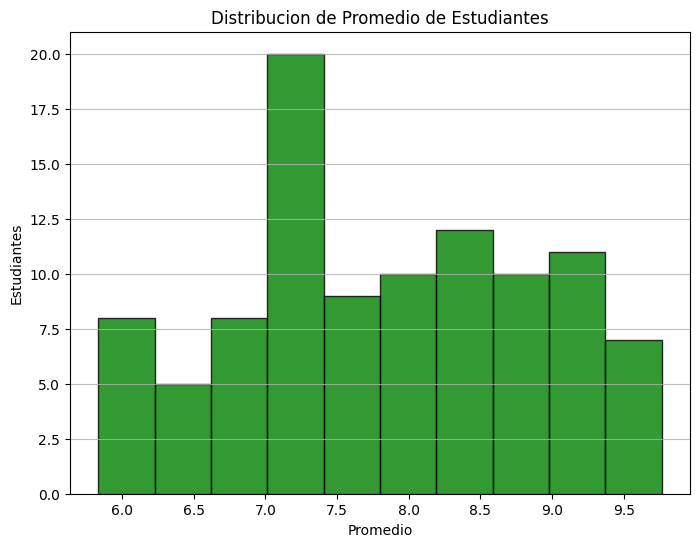

In [56]:
# El histograma muestra la distribucion de las calificaciones de los estudiantes.
plt.figure(figsize=(8,6))
plt.hist(df["Promedio"], bins=10, color= "green" , edgecolor="black", alpha=0.8)
plt.title("Distribucion de Promedio de Estudiantes")
plt.xlabel("Promedio")
plt.ylabel("Estudiantes")
plt.grid(axis="y", alpha=0.8)
plt.show() # Muestra el histograma de la distribucion de las calificaciones de los estudiantes.

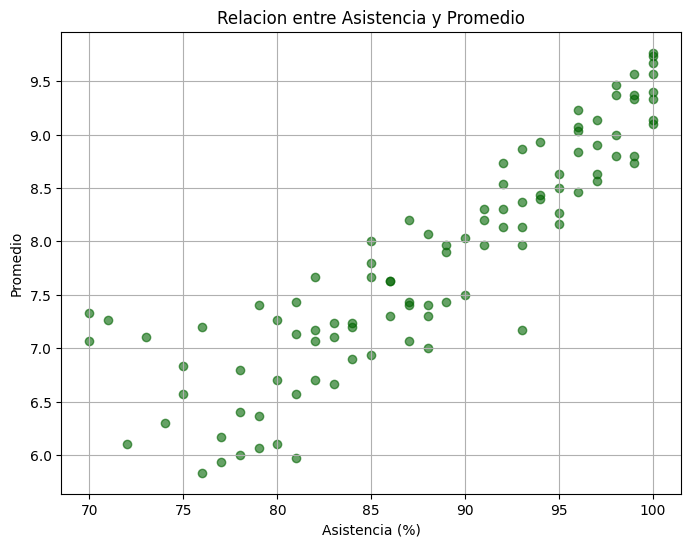

In [57]:
# El grafico de dispersión muestra la relación entre las calificaciones y la asistencia.
plt.figure(figsize=(8,6))
plt.scatter(df["Asistencia"], df["Promedio"], color="darkgreen", alpha=0.6)
plt.title("Relacion entre Asistencia y Promedio")
plt.xlabel("Asistencia (%)")
plt.ylabel("Promedio")
plt.grid(True)
plt.show() # Muestra el grafico de dispersión entre la asistencia y el promedio de los estudiantes.

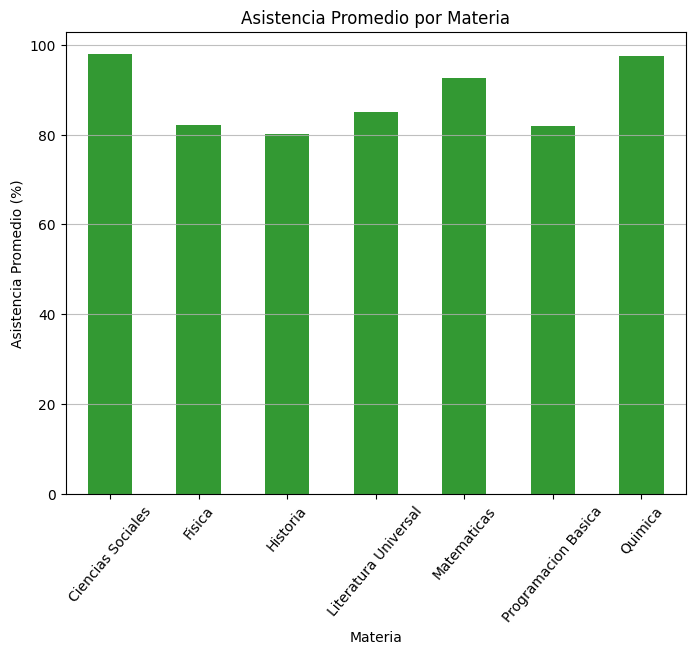

In [63]:
# Grafico de barras que muestra la asistencia promedio por materia.
plt.figure(figsize=(8,6))
df.groupby("Materia")["Asistencia"].mean().plot(kind="bar", color="green", alpha=0.8)
plt.title("Asistencia Promedio por Materia")
plt.xlabel("Materia")
plt.ylabel("Asistencia Promedio (%)")
plt.xticks(rotation=50)
plt.grid(axis="y", alpha=0.8)
plt.show() # Muestra el grafico de barras de la asistencia promedio por materia.

## Actividad Nº 6

In [64]:
# Se exporta el dataframe a un archivo CSV y a una base de datos SQLite.

conn = sqlite3.connect("calificaciones.db")
df.to_sql("Calificaciones", conn, if_exists="replace", index=False)
conn.close()
